# 🏏 Cricket Analytics: Identifying the Best Players for Indian Stadiums Using Historical Data
This project utilizes a structured analytical framework integrating data collection, preprocessing, custom scoring metric development, player ranking, and visualization, implemented primarily using Python and its associated data science libraries (Pandas, Matplotlib, Seaborn). Each step was designed to ensure data integrity, analytical rigor, and the generation of actionable insights relevant to selecting players based on venue-specific historical performance.


## 🔷 Problem Statement

The core problem addressed by this research is the inherent challenge and potential sub-optimality in selecting the most effective cricket players for the specific conditions encountered at different Indian stadiums using traditional methods. Key issues include:

1.	**Subjectivity and Bias**: Traditional selection processes can be influenced by subjective judgments, recent form biases (potentially overlooking long-term suitability), or reputational factors, which may not always align with objective performance potential for a given venue.

2.	**Generalized Performance Metrics**: Standard metrics like overall batting average or bowling economy often fail to capture a player's performance nuances relative to specific stadium characteristics (e.g., performance against spin on turning tracks, effectiveness with the new ball on bouncy pitches).

3.	**Venue Variability**: The significant heterogeneity of Indian cricket stadiums means that a "one-size-fits-all" approach to player selection, based solely on overall career statistics, is often inadequate and can lead to selecting players whose skills are not optimally matched to the upcoming match conditions.

4.	**Lack of Targeted Analytical Tools**: While cricket data is abundant, there is often a lack of readily accessible, specialized analytical tools designed explicitly to compare and rank players based on their historical effectiveness at particular Indian venues across different roles (batsman, bowler, all-rounder, etc.).

This results in a situation where teams may not consistently field the lineup best equipped to exploit the specific conditions of a stadium or counter the opposition effectively, potentially leading to inconsistent performances and missed opportunities. Therefore, there is a clear need for a systematic, data-driven framework to analyze historical player performance specifically tied to individual Indian stadiums, enabling more informed and optimized player selection decisions.


## 🔷 Objectives

The primary goal of this project is to develop and implement a data-driven framework for identifying top-performing Indian cricketers tailored to specific Indian stadium conditions. To achieve this overarching goal, the following specific objectives have been set:

1. **Data Collection and Preprocessing**: To systematically gather comprehensive historical cricket performance data pertaining to Indian players, focusing on matches played at various key Indian stadiums, and preprocess this data to ensure accuracy, consistency, and suitability for analysis.

2. **Develop Custom Scoring Metrics**: To design and implement tailored, role-specific scoring metrics (for batsmen, bowlers, all-rounders, wicketkeepers, and fielders) that quantitatively evaluate players' historical performance, giving appropriate weight to relevant statistics for each role.

3. **Stadium-Specific Player Ranking**: To apply the developed scoring metrics to the prepared dataset to identify and rank the top-performing Indian cricketers across the five key roles for specific, user-selected Indian stadiums based on their historical performance at those venues.

4. **Visualize Analytical Findings**: To utilize Python visualization libraries (e.g., Matplotlib, Seaborn) to create clear, concise, and insightful graphical representations (e.g., bar charts, heatmaps) of the analytical results, facilitating intuitive understanding for stakeholders.

5. **Provide Strategic Recommendations**: To leverage the analytical outputs to provide data-backed recommendations for stadium-specific strategic player selections, thereby aiding selectors, coaches, and analysts in making more informed decisions aimed at improving team performance and success probability.

In [74]:
# Importing necessary libraries

import warnings
import time
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 🔷 Methodology

### ✅ Data Collection and Preparation

Historical performance data formed the bedrock of this analysis. The data was sourced from reputable public cricket statistics repositories, primarily **ESPN Cricinfo's Statsguru database, BCCI, HowSTAT and International Cricket Council (ICC)**. Accuracy and comprehensiveness were prioritized within the constraints of publicly available data.

The dataset was curated to encompass records pertinent to **T20 matches only** played at various major Indian cricket stadiums recognized as regular venues for these matches. The timeframe covered for data extraction was from **January, 2017** to **January, 2025**. This period was chosen to capture relatively contemporary player form and reasonably stable venue characteristics, balancing historical depth with relevance.

Key data fields collected or derived for each relevant player performance instance included:

*   **Player Identifiers:** Player Name, Role (as commonly designated or inferred, e.g., Batsman, Bowler, All-rounder, Wicketkeeper), Team Affiliation (at the time of performance, if available).
*   **Batting Metrics:** Matches Played (at venue), Innings Batted (at venue), Runs Scored (at venue), Batting Average (`Batting_Avg` at venue), Strike Rate (`SR` at venue).
*   **Bowling Metrics:** Matches Played (at venue), Innings Bowled (at venue), Wickets Taken (at venue), Bowling Average (`Bowling_Avg` at venue), Economy Rate (`Economy` at venue).
*   **Fielding/Wicketkeeping Metrics:** Dismissals effected as Wicketkeeper (`Most_dismissals` at venue - typically includes catches and stumpings), Catches taken as a Fielder (`Most_Catches` at venue - ideally excluding wicketkeeper catches if data source differentiates).
*   **Contextual Data:** Stadium Name (the specific venue where the performance occurred).

Upon acquisition, the raw data underwent initial validation checks. This involved scanning for obviously erroneous entries (e.g., negative runs), identifying the prevalence and patterns of missing values (often represented as '-', `NaN`, or blank cells in web scrapes or downloads), checking for inconsistent formatting (particularly in player and stadium names which can vary slightly), and verifying that key metric columns contained predominantly numerical data suitable for calculation. This preparatory step was crucial for designing the subsequent automated cleaning phase.

### ✅ Data Loading and Cleaning

The collected raw data, typically obtained in or converted to a CSV (Comma-Separated Values) format, was loaded into a Pandas DataFrame using Python. Pandas provides a powerful and efficient structure for data manipulation and analysis. The following systematic preprocessing steps were applied programmatically to ensure data quality and consistency for the analysis:

*   **Handling Missing/Special Values:**
    *   Entries explicitly represented by `'-'` (a common placeholder in cricket stats tables on websites like Cricinfo, often indicating 'not applicable', zero value, or 'did not bat/bowl') were identified and replaced with the numerical value `0`. This standardizes the representation for consistent mathematical operations.
    *   Standard missing values represented as `NaN` (Not a Number), which might occur during data loading or result from data merges, were also imputed with `0`. The underlying assumption for this project is that an absence of recorded statistics (e.g., player didn't bowl, hence no wickets or economy) equates to a zero contribution in those specific metrics for the purpose of calculating the performance scores defined later.
*   **Data Type Conversion:** Columns intended for numerical calculations (e.g., `Matches`, `Runs`, `Batting_Avg`, `SR`, `Wickets`, `Bowling_Avg`, `Economy`, `Most_dismissals`, `Most_Catches`) were explicitly converted to appropriate numeric data types (typically `float` to handle averages and rates, or `int` for counts like Matches/Wickets). The `pd.to_numeric` function was used with the `errors='coerce'` argument. This robustly handles any non-numeric entries that might have slipped through initial checks by converting them to `NaN`, which were then subsequently filled with `0` by the `fillna(0)` step immediately following coercion.
*   **String Cleaning:** To ensure accurate filtering and grouping by venue, which relies on exact name matching, leading and trailing whitespace characters were removed from the 'Stadium' column using the Pandas string method `.str.strip()`. Similar cleaning was applied to the 'Player' name column to handle potential inconsistencies in spacing that could otherwise lead to players being treated as different entities.

In [75]:
cricket_df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\Cricket Data.csv")
cricket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Stadium              498 non-null    object 
 1   City                 498 non-null    object 
 2   Format               498 non-null    object 
 3   Player               498 non-null    object 
 4   First_Played         498 non-null    int64  
 5   Last_Played          498 non-null    int64  
 6   Matches              498 non-null    int64  
 7   Inns                 498 non-null    int64  
 8   Not_Out              498 non-null    int64  
 9   Runs                 498 non-null    int64  
 10  High_Score           498 non-null    int64  
 11  Batting_Avg          498 non-null    float64
 12  Stadium_Batting_Avg  498 non-null    float64
 13  SR                   498 non-null    float64
 14  Centuries            498 non-null    int64  
 15  Half_Centuries       498 non-null    int

In [76]:
# -----------------------------------------
# 📥 1. Load and Clean Cricket Dataset
# -----------------------------------------
def load_cricket_data(file_path):
    # Load CSV file
    cricket_df = pd.read_csv(file_path)

    # Drop rows missing key fields
    cricket_df.dropna(subset=['Stadium', 'Player'], inplace=True)

    # Replace '-' with NaN for numerical conversion
    cricket_df.replace('-', np.nan, inplace=True)

    # Convert numeric columns to float/int where applicable
    numeric_cols = [
        'Matches', 'Runs', 'Batting_Avg', 'SR', 'Wickets',
        'Bowling_Avg', 'Economy', 'Most_dismissals', 'Most_Catches'
    ]
    for col in numeric_cols:
        if col in cricket_df.columns:
            cricket_df[col] = pd.to_numeric(cricket_df[col], errors='coerce')

    # Remove extra whitespace from stadium names
    cricket_df['Stadium'] = cricket_df['Stadium'].str.strip()
    
    return cricket_df


In [77]:
with pd.option_context("display.max_columns", None):
    display(cricket_df.sample(10))

,Stadium,City,Format,Player,First_Played,Last_Played,Matches,Inns,Not_Out,Runs,High_Score,Batting_Avg,Stadium_Batting_Avg,SR,Centuries,Half_Centuries,0s,4s,6s,Wickets,Bowling_Avg,Stadium_Bowling_Avg,Economy,Most_dismissals,Most_Catches
334,"Greenfield International Stadium, Thiruvananth...",Thiruvananthapuram,T20,JJ Bumrah (IND),2017,2017,1,1,0,0,0,0.00,20.988750,0.00,0,0,0,0,0,2,4.50,7.055000,4.50,0,0
353,"Shrimant Madhavrao Scindia Cricket Stadium, Gw...",Gwalior,T20,Abhishek Sharma (IND),2024,2024,1,1,0,16,16,16.00,22.600000,228.57,0,0,0,2,1,0,0.00,7.399000,0.00,0,0
329,"Greenfield International Stadium, Thiruvananth...",Thiruvananthapuram,T20,NT Tilak Varma (IND),2023,2023,1,1,1,7,7,0.00,20.988750,350.00,0,0,0,0,1,0,0.00,7.055000,0.00,0,1
263,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,T20,AR Patel (IND),2025,2025,1,1,0,2,2,2.00,18.687500,66.66,0,0,0,0,0,2,16.00,6.736842,8.00,0,0
194,"JSCA International Stadium Complex, Ranchi",Rachi,T20,RA Tripathi (IND),2023,2023,1,1,0,0,0,0.00,14.822000,0.00,0,0,0,0,0,0,0.00,13.190000,0.00,0,1
20,"Arun Jaitley Stadium, Delhi",Delhi,T20,B Kumar (IND),2017,2022,2,2,0,0,0,0.00,24.705882,0.00,0,0,0,0,0,2,33.00,13.623043,9.42,0,0
361,"Wankhede Stadium, Mumbai",Mumbai,T20,RG Sharma (IND),2012,2019,4,4,0,165,71,41.25,35.435882,158.65,0,1,0,14,10,0,0.00,10.955333,0.00,0,2
13,"Arun Jaitley Stadium, Delhi",Delhi,T20,Washington Sundar (IND),2019,2024,2,2,2,14,14,0.00,24.705882,280.00,0,0,0,0,2,1,29.00,13.623043,5.80,0,1
103,"Eden Gardens, Kolkata",Kolkata,T20,HH Pandya (IND),2016,2025,2,1,1,3,3,0.00,21.037000,75.00,0,0,0,0,0,3,22.33,10.529394,11.16,0,1
259,"MA Chidambaram Stadium, Chepauk, Chennai",Chennai,T20,Arshdeep Singh (IND),2025,2025,1,1,0,6,6,6.00,18.687500,150.00,0,0,0,1,0,1,40.00,6.736842,10.00,0,0


In [78]:
cricket_df.columns.tolist()

['Stadium',
 'City',
 'Format',
 'Player',
 'First_Played',
 'Last_Played',
 'Matches',
 'Inns',
 'Not_Out',
 'Runs',
 'High_Score',
 'Batting_Avg',
 'Stadium_Batting_Avg',
 'SR',
 'Centuries',
 'Half_Centuries',
 '0s',
 '4s',
 '6s',
 'Wickets',
 'Bowling_Avg',
 'Stadium_Bowling_Avg',
 'Economy',
 'Most_dismissals',
 'Most_Catches']

### ✅ Scoring Formula Definition and Justification

To move beyond simple, often context-poor, averages and provide a more role-specific evaluation of player performance *historically recorded at a given stadium*, custom heuristic scoring metrics were designed. These formulas combine relevant, readily available statistics with specific weightings intended to reflect the perceived core objectives and value contributions of each player role within the context of **T20** cricket.

*   **Batting Score:** Designed to balance consistent run accumulation with the pace of scoring, crucial in modern limited-overs cricket.
    *   **Formula:** `Score = 0.8 * Batting_Avg + 0.2 * SR`
    *   **Justification:** Batting Average (`Batting_Avg`) is a fundamental measure of a batsman's ability to score runs per dismissal, reflecting consistency and wicket preservation. It is weighted heavily (80%) as sustained run contribution is paramount. Strike Rate (`SR`) measures scoring speed (runs per 100 balls), vital for impacting game tempo. It receives a 20% weighting, acknowledging its importance but prioritizing the substance provided by average. This blend aims to identify batsmen who score substantial runs efficiently at the specific venue.
*   **Bowling Score:** Designed to reward effective wicket-taking while simultaneously rewarding economical bowling (run containment).
    *   **Formula:** `Score = (40 / Economy) + (30 / Bowling_Avg) + (3 * Wickets)`
    *   **Handling Division by Zero:** The implementation includes checks to prevent division by zero. If Economy or Bowling_Avg was 0, that specific component (40/Econ or 30/Avg) was treated as 0 to avoid errors and infinite scores, reflecting that while exceptional, zero average/economy based on very limited bowling might unduly skew scores, or state if epsilon was added.
    *   **Justification:** Lower Economy Rate and lower Bowling Average are hallmarks of effective bowling. Using their inverse (`1/Economy`, `1/Bowling_Avg`) transforms these metrics so that higher values in the formula correspond to better performance (lower run concession). Wickets Taken directly measure impact. The constants (40, 30, 3) act as scaling factors chosen heuristically to balance the contributions, ensuring that run containment (economy, average) and wicket-taking are all significantly rewarded in the final score. The scaling aims to make the components somewhat comparable in magnitude for typical performance ranges.
*   **All-rounder Score:** Designed to identify players making substantial combined contributions with both bat and ball at the venue.
    *   **Formula:** `Score = (Batting_Score * Bowling_Score) / 1000`
    *   **Justification:** A multiplicative approach ensures that a high score necessitates reasonably strong performance in *both* disciplines. A player excelling solely in batting or bowling but performing poorly in the other discipline will have their score significantly diminished compared to a player with solid, balanced contributions. This reflects the expectation that a true all-rounder impacts the game with both skills. The division by 1000 is purely a scaling factor, chosen empirically to bring the resulting scores into a range broadly comparable with the individual batting and bowling scores, preventing disproportionately large values.
*   **Wicketkeeper Score:** Focuses on the primary quantifiable dismissal contribution unique to the role.
    *   **Formula:** `Score = Most_dismissals * 10`
    *   **Justification:** The total number of dismissals effected (catches + stumpings) is the most direct and commonly available statistic reflecting a wicketkeeper's core defensive contribution at a venue. While factors like conceded byes or fielding ability are important, they are harder to quantify reliably from standard historical datasets. The multiplication by 10 is a simple scaling factor chosen to adjust the score's magnitude to be somewhat comparable to other role scores.
*   **Fielder Score:** Focuses on catching ability as a primary indicator of fielding impact.
    *   **Formula:** `Score = Most_Catches * 10`
    *   **Justification:** Catches taken (ideally excluding wicketkeeper catches if the data differentiates) are the most consistently recorded statistic reflecting a non-wicketkeeping fielder's direct contribution to taking wickets. Metrics like runs saved or run-out involvements are less standardized or available in aggregated historical data. Therefore, catches serve as a measurable proxy for fielding effectiveness at the venue. The scaling factor of 10 adjusts the score magnitude, similar to the wicketkeeper score.


In [79]:
# -------------------------------------------------
# ⚙️ 2. Define Scoring Formulas for Each Player Role
# -------------------------------------------------
def calculate_batting_score(row):
    runs = row.get('Runs', 0)
    inns = row.get('Inns', 0)
    not_outs = row.get('Not_Out', 0)
    balls_faced = runs / (row.get('SR', 1)) * 100 if row.get('SR', 0) > 0 else 0
    dismissals = inns - not_outs if inns > not_outs else 1
    batting_avg = runs / dismissals if dismissals > 0 else 0
    strike_rate = (runs / balls_faced) * 100 if balls_faced > 0 else 0
    return round(0.8 * batting_avg + 0.2 * strike_rate, 2)

def calculate_bowling_score(row):
    wickets = row.get('Wickets', 0)
    economy = row.get('Economy', np.nan)
    bowling_avg = row.get('Bowling_Avg', np.nan)
    score = 0
    if pd.notnull(economy) and economy > 0:
        score += 40 / economy
    if pd.notnull(bowling_avg) and bowling_avg > 0:
        score += 30 / bowling_avg
    if pd.notnull(wickets):
        score += 30 * wickets / 10
    return round(score, 2)

def calculate_allrounder_score(row):
    bat = calculate_batting_score(row)
    bowl = calculate_bowling_score(row)
    return round((bat * bowl) / 1000, 2) if bat > 0 and bowl > 0 else 0

def calculate_wicketkeeper_score(row):
    dismissals = row.get('Most_dismissals', 0)
    if pd.isnull(dismissals) or dismissals == 0:
        return 0
    catches = dismissals * 0.6
    stumpings = dismissals * 0.3
    run_outs = dismissals * 0.1
    score = catches * 8 + stumpings * 12 + run_outs * 9
    return round(score, 2)

def calculate_fielder_score(row):
    catches = row.get('Most_Catches', 0)
    return catches * 10 if pd.notnull(catches) else 0

# ⬇️ Adding Stadium Summary ⬇️

def generate_stadium_summary(cricket_df, stadium):
    df = cricket_df[cricket_df['Stadium'] == stadium].copy()
    
    print(f"\n📍 Stadium Profile Summary: {stadium}")
    print("─" * 60)

#   Total Matches Recorded
    total_matches = df['Matches'].sum()
    print(f"📅 Total Matches Recorded     : {int(total_matches)}")

#   Best Batsman
    df['Batting_Score'] = df.apply(calculate_batting_score, axis=1)
    top_batsman = df.sort_values(by='Batting_Score', ascending=False).iloc[0]
    print(f"🏅 Best Batsman              : {top_batsman['Player']} (Score: {top_batsman['Batting_Score']:.2f})")

#   Best Bowler
    df['Bowling_Score'] = df.apply(calculate_bowling_score, axis=1)
    top_bowler = df.sort_values(by='Bowling_Score', ascending=False).iloc[0]
    print(f"🔥 Best Bowler               : {top_bowler['Player']} (Score: {top_bowler['Bowling_Score']:.2f})")

#   Highest Individual Score
    df['High_Score'] = pd.to_numeric(df['High_Score'], errors='coerce')
    highest_scorer = df[df['High_Score'] == df['High_Score'].max()]
    print(f"💥 Highest Individual Score   : {highest_scorer.iloc[0]['Player']} ({int(highest_scorer.iloc[0]['High_Score'])})")

#   Most Centuries
    df['Centuries'] = pd.to_numeric(df['Centuries'], errors='coerce')
    top_centuries = df[df['Centuries'] == df['Centuries'].max()]
    print(f"🎯 Most Centuries             : {top_centuries.iloc[0]['Player']} ({int(top_centuries.iloc[0]['Centuries'])})")

#   Most Dismissals (WK)
    top_dismissals = df[df['Most_dismissals'] == df['Most_dismissals'].max()]
    if not top_dismissals.empty:
        print(f"🧤 Most Dismissals (WK)       : {top_dismissals.iloc[0]['Player']} ({int(top_dismissals.iloc[0]['Most_dismissals'])})")

#   Most Catches (Fielder)
    top_catches = df[df['Most_Catches'] == df['Most_Catches'].max()]
    if not top_catches.empty:
        print(f"🚀 Most Catches (Fielder)     : {top_catches.iloc[0]['Player']} ({int(top_catches.iloc[0]['Most_Catches'])})")

    df['4s'] = pd.to_numeric(df['4s'], errors='coerce')
    df['6s'] = pd.to_numeric(df['6s'], errors='coerce')

    top_fours = df[df['4s'] == df['4s'].max()]
    top_sixes = df[df['6s'] == df['6s'].max()]

    print(f"🔹 Most 4s                    : {top_fours.iloc[0]['Player']} ({int(top_fours.iloc[0]['4s'])})")
    print(f"🔸 Most 6s                    : {top_sixes.iloc[0]['Player']} ({int(top_sixes.iloc[0]['6s'])})")

#   Calculate average batting and bowling scores using your scoring logic
    df['Batting_Score'] = df.apply(calculate_batting_score, axis=1)
    df['Bowling_Score'] = df.apply(calculate_bowling_score, axis=1)

    avg_batting_score = df['Batting_Score'].dropna().mean()
    avg_bowling_score = df['Bowling_Score'].dropna().mean()

    print(f"📊 Avg Batting Score          : {avg_batting_score:.2f}")
    print(f"📊 Avg Bowling Score          : {avg_bowling_score:.2f}")


# Adding a "Stadium Type" Tag
    avg_runs = df['Runs'].mean()
    avg_wickets = df['Wickets'].mean()

    if avg_runs > 30 and avg_wickets < 2:
        print("📌 Stadium Type               : Batting-Friendly")
    elif avg_wickets > 3:
        print("📌 Stadium Type               : Bowling-Friendly")
    else:
        print("📌 Stadium Type               : Balanced")


    print("─" * 60)


### ✅ Player Ranking

Once the scoring metrics were defined and the dataset cleaned and prepared, the core analytical process involved ranking players for a user-selected venue and a specific role:

1.  **Stadium Selection:** The analytical script prompts the user to input the exact name of an Indian stadium present in the dataset for which the analysis is desired. Input validation ensures a valid stadium name is provided.
2.  **Data Filtering:** The main preprocessed Pandas DataFrame (`cricket_df`) is filtered using boolean indexing to create a temporary DataFrame containing only the rows (performance records) corresponding to the selected stadium name.
3.  **Score Calculation:** For the player role currently being analyzed (e.g., 'Batsmen', 'Bowlers', etc., iterated through a predefined list), the appropriate scoring function (e.g., `calculate_batting_score`) is applied row-wise to the stadium-filtered DataFrame using the `.apply()` method with `axis=1`. This computation generates a new 'Score' column containing the calculated performance score for each player record at that specific venue for that specific role.
4.  **Sorting and Selection:** The resulting DataFrame (containing players, their stats at the venue, and the calculated role-specific score) is then sorted in descending order based on the values in the 'Score' column. This arranges players from highest score to lowest.
5.  **Top N Extraction:** The `.head(N)` method is used to select the top N rows from the sorted DataFrame (where N was typically set to 5 for this project, providing a manageable list of top performers). This yields the final ranked list of the highest-scoring individuals for the analyzed role at the chosen stadium based on historical performance data.

This entire filtering, scoring, sorting, and extraction process (Steps 2-5) is repeated automatically within a loop for each of the five defined player roles ('Batsmen', 'Bowlers', 'All-Rounders', 'Wicket Keepers', 'Fielders') for the single stadium selected by the user.

In [80]:
# -----------------------------------------------------------------
# 🔍 3. Get Top Players by Role for the Selected Stadium
# -----------------------------------------------------------------
def get_top_players(cricket_df, stadium, role, top_n=5):
    df = cricket_df[cricket_df['Stadium'] == stadium].copy()
    if df.empty:
        print(f"No data found for stadium: {stadium}")
        return pd.DataFrame()

    if role == 'Batsmen':
        df['Score'] = df.apply(calculate_batting_score, axis=1)
    elif role == 'Bowlers':
        df['Score'] = df.apply(calculate_bowling_score, axis=1)
    elif role == 'All-Rounders':
        df['Score'] = df.apply(calculate_allrounder_score, axis=1)
    elif role == 'Wicket Keepers':
        df['Score'] = df.apply(calculate_wicketkeeper_score, axis=1)
    elif role == 'Fielders':
        df['Score'] = df.apply(calculate_fielder_score, axis=1)
    else:
        return pd.DataFrame()

    top_df = df[['Player', 'Score']].dropna().sort_values(by='Score', ascending=False).drop_duplicates().head(top_n)
    top_df.reset_index(drop=True, inplace=True)
    return top_df


### ✅ Visualization Techniques

To effectively communicate the analytical findings and make the rankings easily interpretable, several standard data visualization techniques were implemented using Python's widely-used Matplotlib and Seaborn libraries:

*   **Individual Role Bar Charts:** The primary visualization generated for each role (Batsmen, Bowlers, All-Rounders, Wicket Keepers, Fielders) at the selected stadium was a horizontal bar chart (`seaborn.barplot`). This plot clearly displays the names of the top N ranked players on the vertical axis and their corresponding calculated scores on the horizontal axis. Bars are ordered from highest score to lowest. A distinct color palette (e.g., 'viridis') was used for visual appeal and differentiation. These charts allow for immediate visual comparison of the leading performers within a specific role and their relative score magnitudes at that venue. (Implemented via the `plot_top_players` function).
*   **Combined Role Distribution Plot (Optional):** A grouped bar chart was potentially generated using (`plot_rolewise_distribution`) to show the top player(s) from each of the five roles side-by-side for the selected stadium, allowing a visual comparison of typical score ranges across different roles at that venue. This provides a holistic snapshot. This was included in final analysis/results.
*   **Player-Role Heatmap (Optional):** A heatmap was considered using (`plot_player_role_heatmap`) to visualize the scores achieved by the set of top-identified players across multiple roles they might potentially qualify for (especially relevant for all-rounders). Rows would represent players, columns represent roles, and cell color/annotation indicates the score. This can highlight player versatility. Same was included in final analysis/results.

The primary focus was on the clear, individual bar charts (one per role) as the most direct way to present the core findings (top players per role) demanded by the project objectives. These visualizations translate the numerical outputs into easily digestible graphical formats suitable for stakeholders like coaches and selectors.

In [81]:
# ---------------------------------------
# 📊 4. Visualization for Individual Role
# ---------------------------------------
def plot_top_players(top_players, role, stadium):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Score', y='Player', data=top_players, palette='Set2', hue="Score", 
                alpha=0.8, edgecolor='black', width=0.5, linewidth=0.5, saturation=0.8)
    plt.title(f"Top {role} at {stadium}")
    plt.xlabel('Score')
    plt.ylabel('Player')
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------
# 📊 5. Visualization: Combined Role-Wise Bar and Heatmap
# ------------------------------------------------------------
def plot_rolewise_distribution(top_players_dict):
    plt.figure(figsize=(12, 6))
    roles = list(top_players_dict.keys())
    for role, players in top_players_dict.items():
        sns.barplot(x=players['Player'], y=players['Score'], label=role, palette='Set2', hue=players['Player'], 
                    alpha=0.7, edgecolor='black', width=0.5, linewidth=0.5, saturation=0.8)
    plt.title('Role-wise Score Distribution')
    plt.xlabel('Players')
    plt.ylabel('Scores')
    handles, labels = plt.gca().get_legend_handles_labels()
    unique_labels = list(set(labels))
    plt.legend(handles[:len(unique_labels)], unique_labels, title='Roles', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def plot_player_role_heatmap(top_players_dict):
    heatmap_data = []
    for role, players in top_players_dict.items():
        for _, row in players.iterrows():
            heatmap_data.append({'Role': role, 'Player': row['Player'], 'Score': row['Score']})
    heatmap_df = pd.DataFrame(heatmap_data)
    pivot = heatmap_df.pivot(index='Player', columns='Role', values='Score').fillna(0)
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot, annot=True, fmt=".1f", cmap=sns.color_palette("crest", as_cmap=True), cbar_kws={'label': 'Score'})
    plt.title("Player Role Heatmap")
    plt.xlabel("Role")
    plt.ylabel("Player")
    plt.tight_layout()
    plt.show()

# ------------------------------------------------------------
# 📊 6. Visualization: Batting vs Bowling Average per Stadium
# ------------------------------------------------------------
def plot_boundary_patterns(cricket_df, stadium):
    df = cricket_df[cricket_df['Stadium'] == stadium][['Player', '4s', '6s']].dropna()
    df = df.groupby('Player')[['4s', '6s']].sum().sort_values(by='4s', ascending=False).head(10)

    df.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#c9e4ca', '#8bc34a'])
    plt.title(f"Boundary Scoring Patterns (4s vs 6s) at {stadium}")
    plt.ylabel("Count")
    plt.xlabel("Player")
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


### ✅ Implementation Details

The entire analytical workflow, encompassing data ingestion, cleaning, user interaction, score calculation, player ranking, and result visualization, was orchestrated within a single main Python script. The script was structured logically using functions to promote modularity and readability, primarily executed via a `main()` function block. The typical execution flow was:

1.  **Initialization:** Import necessary libraries (Pandas, Matplotlib, Seaborn). Define global constants or configuration if needed (like the file path).
2.  **Data Loading & Cleaning:** Execute the data loading and cleaning steps (as defined in Section 3.2), making the cleaned DataFrame (`cricket_df`) available for subsequent steps. Error handling ensures the script exits gracefully if data loading fails.
3.  **User Input (Stadium Selection):** Prompt the user to enter the name of the Indian stadium for analysis. Include logic to list available stadiums from the DataFrame and validate the user's input against this list, re-prompting if necessary.
4.  **Iterative Analysis by Role:** Define a list of the player roles to be analyzed (`['Batsmen', 'Bowlers', ...]`). Loop through this list. Inside the loop, for the current role:
    *   Call the `get_top_players` function (Section 3.4), passing the main DataFrame, the selected stadium name, the current role, and the desired number of top players (N=5).
    *   Receive the resulting DataFrame containing the top players and their scores for that role/stadium.
    *   Check if the result is not empty. If results exist:
        *   Print the ranked list clearly to the console.
        *   Call the `plot_top_players` function (Section 3.5) to generate and display the bar chart visualization for these players.
        *   Optionally, store this result DataFrame in a dictionary keyed by role, for potential use in combined visualizations later.
    *   Handle the case where no players are found for a role at that stadium.
5.  **Combined Visualizations (Optional):** After the loop finishes, if combined plots (like role distribution or heatmap) were implemented and desired, call the corresponding visualization functions, passing the dictionary containing all the top player results collected during the loop.
6.  **Conclusion:** Print a final message indicating the analysis completion.

This modular structure, utilizing separate functions for distinct logical tasks (loading, cleaning, scoring, ranking, plotting), ensured the code was organized, easier to test and debug, and potentially reusable for future extensions. Python, along with the specified libraries, provided a comprehensive and efficient environment for implementing this entire data analysis pipeline.

*(Refer below for the main execution block (`if __name__ == "__main__":` and the `main()` function) of the Python script demonstrating this orchestrated workflow.)*


🏟️ Available Stadiums:
1. Arun Jaitley Stadium, Delhi
2. Barabati Stadium, Cuttack
3. Barsapara Cricket Stadium, Guwahati
4. Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow
5. Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam
6. Eden Gardens, Kolkata
7. Green Park, Kanpur
8. Greenfield International Stadium, Thiruvananthapuram
9. Himachal Pradesh Cricket Association Stadium, Dharamsala
10. Holkar Cricket Stadium, Indore
11. Inderjit Singh Bindra Stadium Punjab Cricket Association Stadium
12. JSCA International Stadium Complex, Ranchi
13. M.Chinnaswamy Stadium, Bengaluru
14. MA Chidambaram Stadium, Chepauk, Chennai
15. Maharashtra Cricket Association Stadium, Pune
16. Narendra Modi Stadium, Motera, Ahmedabad
17. Niranjan Shah Stadium, Rajkot
18. Rajiv Gandhi International Stadium (Uppal Stadium), Hyderabad
19. Sawai Mansingh Stadium, Jaipur
20. Shaheed Veer Narayan Singh International Stadium, Raipur
21. Shrimant Madhavrao Scindia Cricket Stadium,


🔍 Analyzing Player Performance at: MA Chidambaram Stadium, Chepauk, Chennai


📍 Stadium Profile Summary: MA Chidambaram Stadium, Chepauk, Chennai
────────────────────────────────────────────────────────────
📅 Total Matches Recorded     : 21
🏅 Best Batsman              : V Kohli (IND) (Score: 90.15)
🔥 Best Bowler               : HH Pandya (IND) (Score: 21.33)
💥 Highest Individual Score   : NT Tilak Varma (IND) (72)
🎯 Most Centuries             : NT Tilak Varma (IND) (0)
🧤 Most Dismissals (WK)       : SV Samson (IND) (1)
🚀 Most Catches (Fielder)     : NT Tilak Varma (IND) (2)
🔹 Most 4s                    : V Kohli (IND) (10)
🔸 Most 6s                    : NT Tilak Varma (IND) (5)
📊 Avg Batting Score          : 35.74
📊 Avg Bowling Score          : 4.66
📌 Stadium Type               : Balanced
────────────────────────────────────────────────────────────

🏏 Top Batsmen:
                 Player  Score
          V Kohli (IND)  90.15
   NT Tilak Varma (IND)  83.78
          RR Pant (IND)  76.9

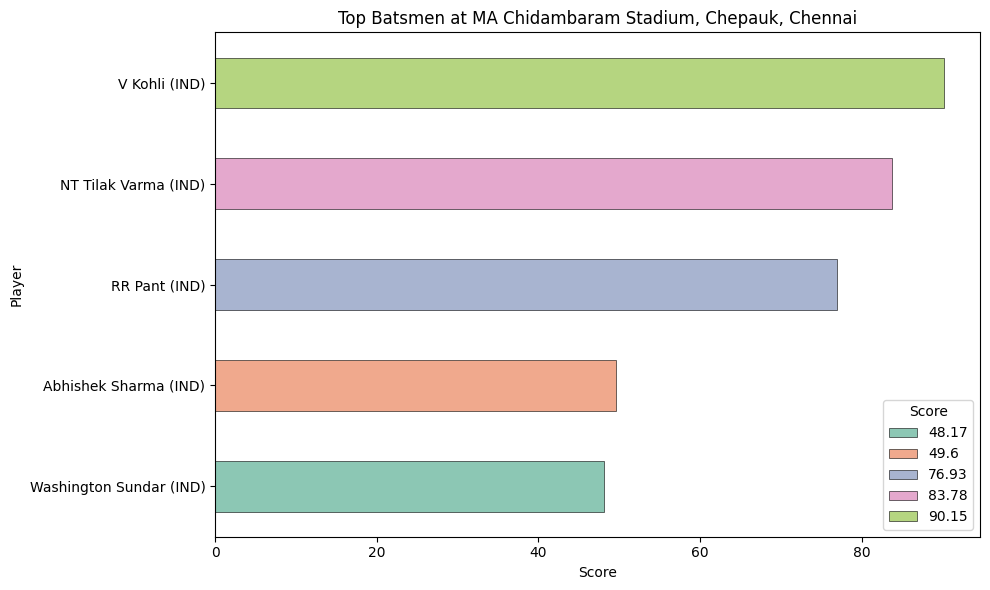


🎯 Top Bowlers:
                 Player  Score
        HH Pandya (IND)  21.33
        YS Chahal (IND)  13.86
         AR Patel (IND)  12.88
Washington Sundar (IND)  12.19
         CV Varun (IND)  11.79


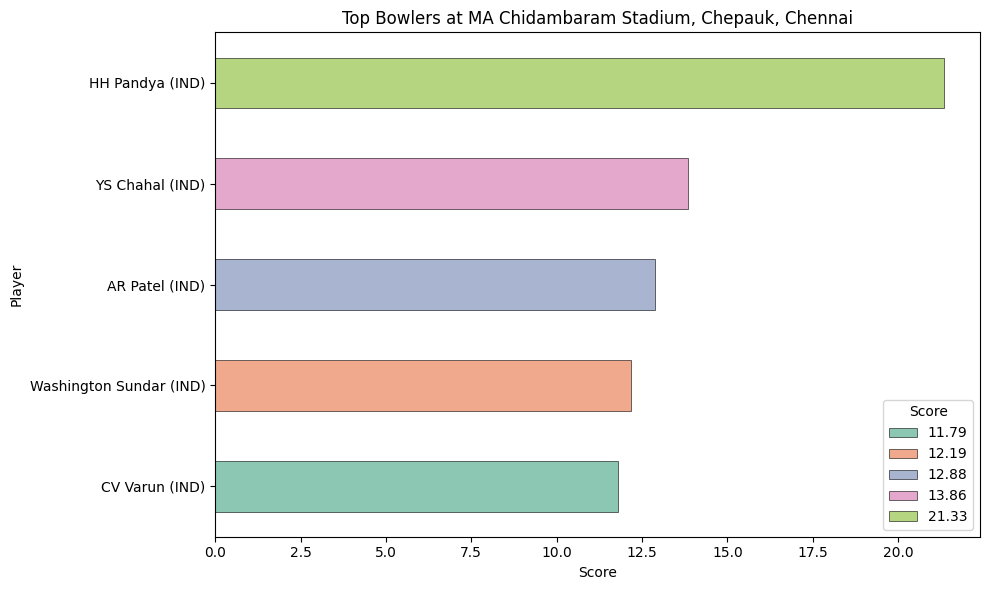


🔥 Top All-Rounders:
                 Player  Score
        HH Pandya (IND)   0.62
Washington Sundar (IND)   0.59
  Abhishek Sharma (IND)   0.44
   Arshdeep Singh (IND)   0.27
         AR Patel (IND)   0.19


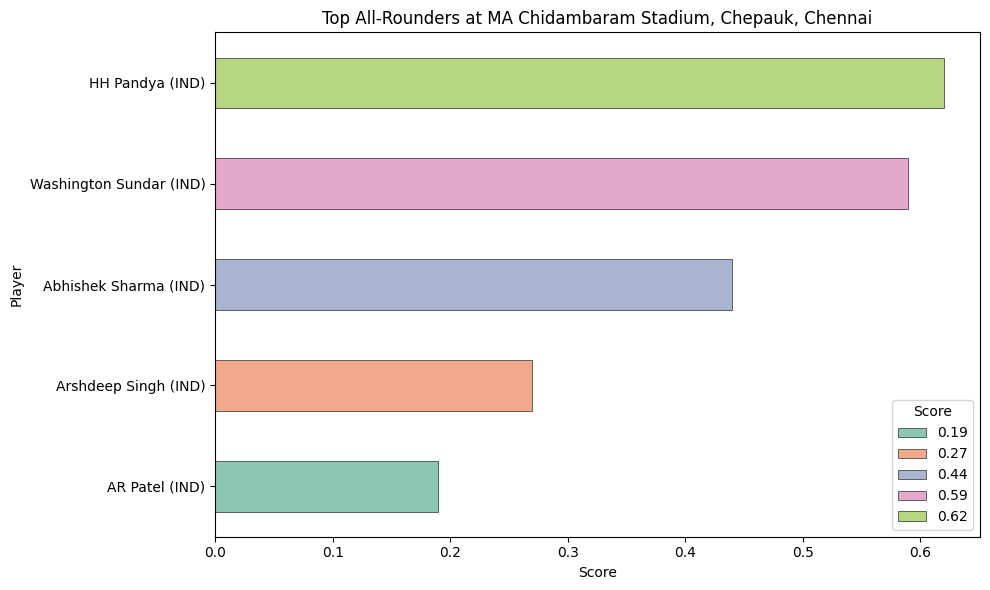


🧤 Top Wicket Keepers:
                 Player  Score
        SV Samson (IND)    9.3
          V Kohli (IND)    0.0
   NT Tilak Varma (IND)    0.0
          RR Pant (IND)    0.0
Washington Sundar (IND)    0.0


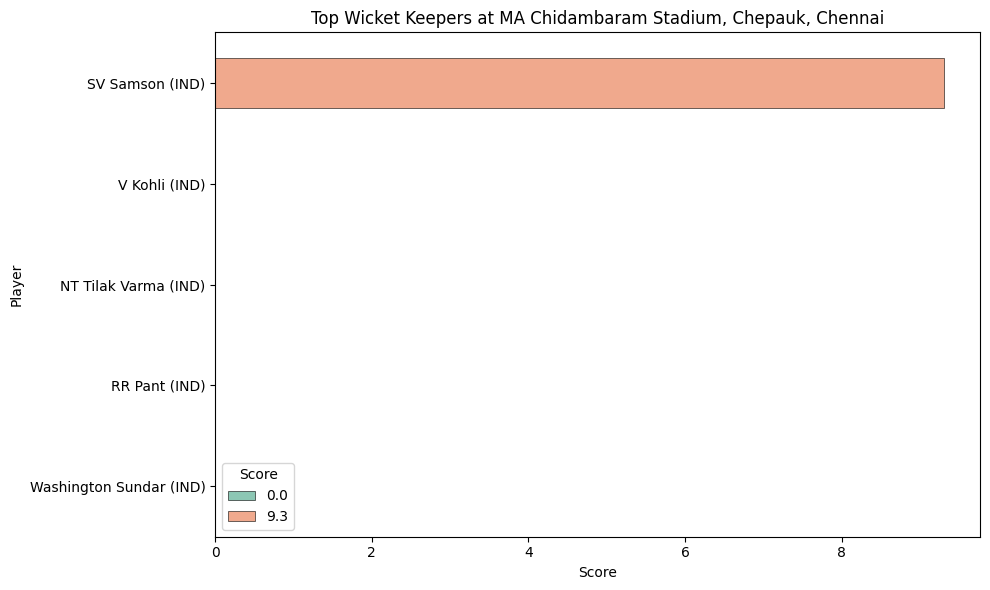


🚀 Top Fielders:
                 Player  Score
   NT Tilak Varma (IND)     20
         DC Jurel (IND)     10
Washington Sundar (IND)     10
        KH Pandya (IND)     10
          V Kohli (IND)      0


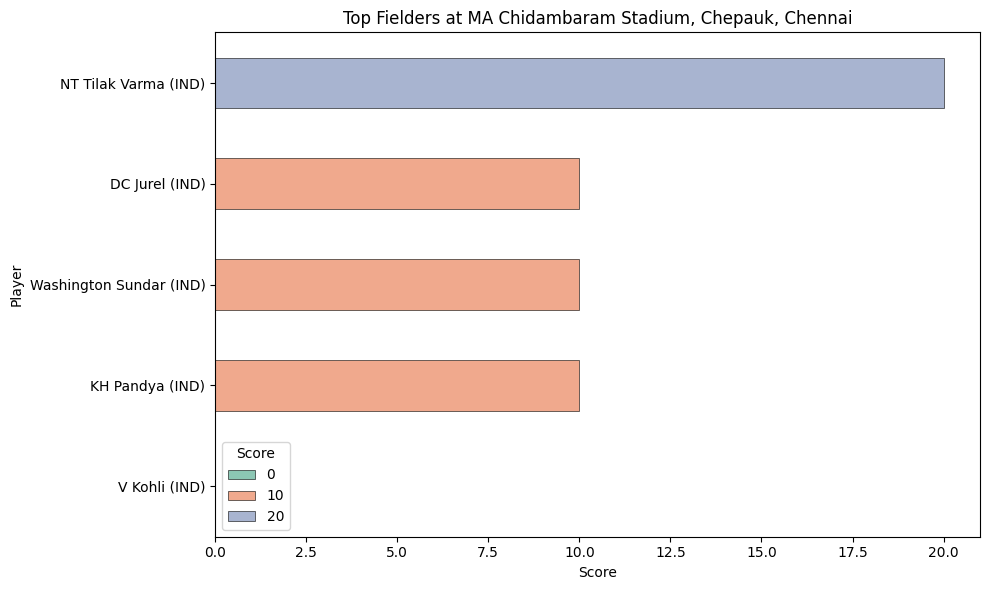

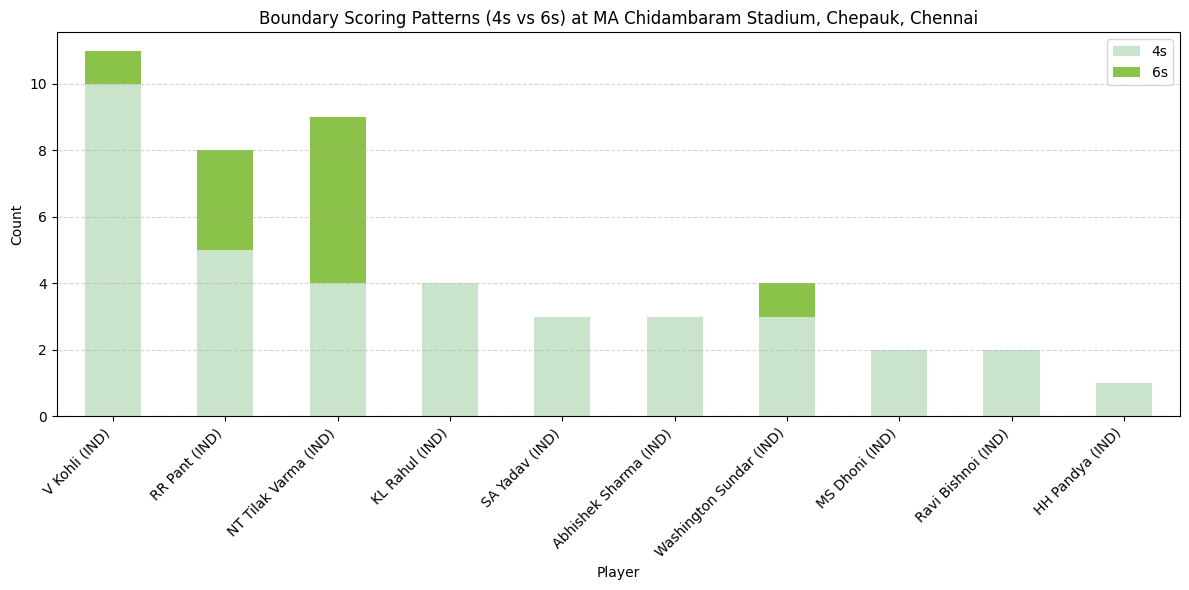

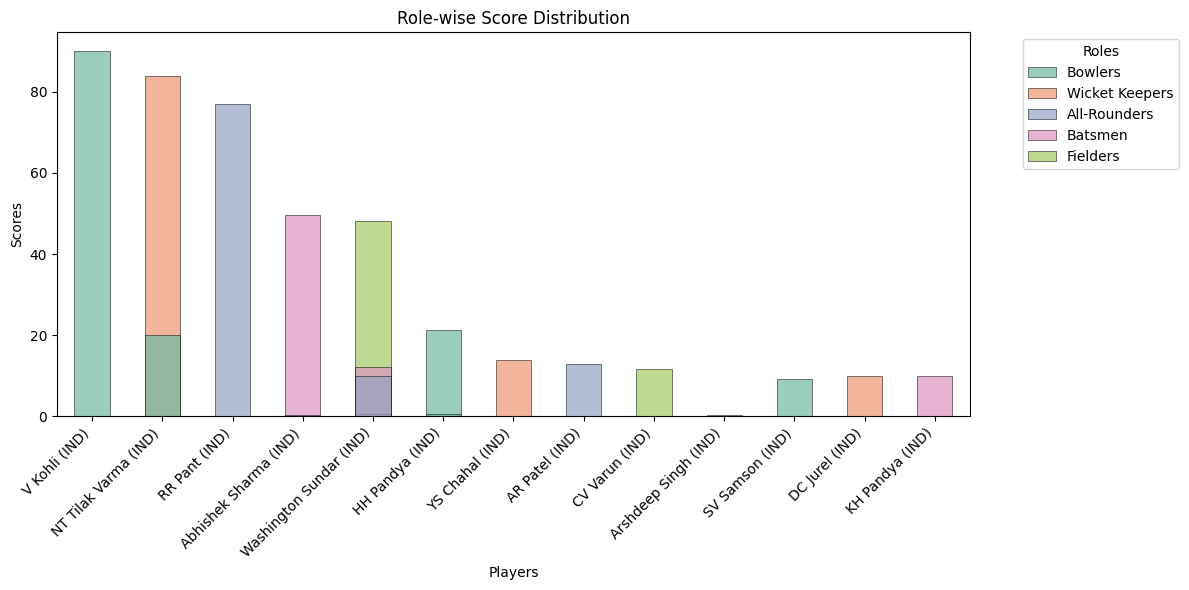

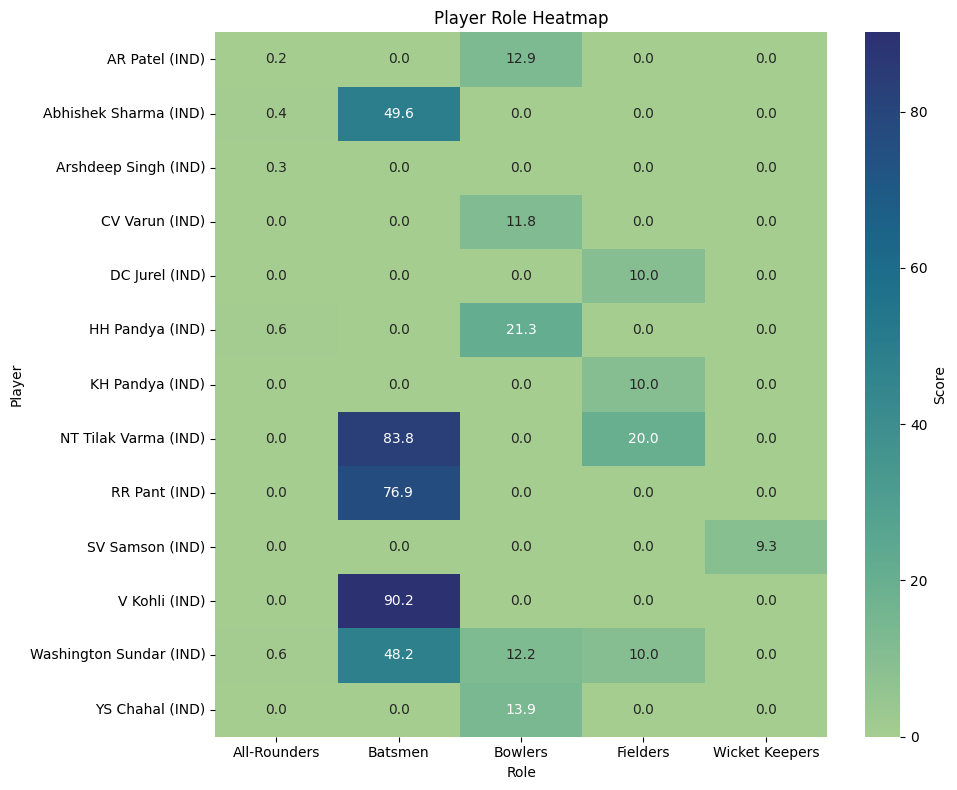


🔍 Analysis Complete!


In [116]:
# ------------------------------
# 🚀 6. Main Execution Function
# ------------------------------
def main():
    # Load the dataset into cricket_df
    file_path = r"C:\Users\hp\OneDrive\Desktop\Cricket Data.csv"
    cricket_df = load_cricket_data(file_path)

    # Get list of unique stadiums
    stadiums = sorted(cricket_df['Stadium'].dropna().unique())

    # Display available stadiums
    print("\n🏟️ Available Stadiums:")
    for idx, stadium in enumerate(stadiums, 1):
        print(f"{idx}. {stadium}")

    # Prompt user to select a stadium
    while True:
        try:
            choice = int(input("\nEnter the number of the stadium you want to analyze: "))
            if 1 <= choice <= len(stadiums):
                selected_stadium = stadiums[choice - 1]
                break
            else:
                print("❌ Invalid number. Try again.")
        except ValueError:
            print("❌ Please enter a valid integer.")
    print(f"\n🔍 Analyzing Player Performance at: {selected_stadium}\n")

# ⬇️ Call the summary card here
    generate_stadium_summary(cricket_df, selected_stadium)

    # Define player roles
    roles = ['Batsmen', 'Bowlers', 'All-Rounders', 'Wicket Keepers', 'Fielders']
    role_emojis = {
        'Batsmen': '🏏 Top Batsmen',
        'Bowlers': '🎯 Top Bowlers',
        'All-Rounders': '🔥 Top All-Rounders',
        'Wicket Keepers': '🧤 Top Wicket Keepers',
        'Fielders': '🚀 Top Fielders'}

    # Analyze and plot top players by role
    top_players_dict = {}
    for role in roles:
        print(f"\n{role_emojis.get(role, role)}:")
        top_players = get_top_players(cricket_df, selected_stadium, role)
        if not top_players.empty:
            print(top_players.to_string(index=False))
            top_players_dict[role] = top_players
            plot_top_players(top_players, role, selected_stadium)
        else:
            print(f"No sufficient data for {role}.\n")

    # Plot all visual summaries
    plot_boundary_patterns(cricket_df, selected_stadium)
    plot_rolewise_distribution(top_players_dict)
    plot_player_role_heatmap(top_players_dict)
    print("\n🔍 Analysis Complete!")

# ------------------------------
# 🏁 Run the Analysis
# ------------------------------
if __name__ == "__main__":
    main()

# -----------------------------------------
# End of the script
# -----------------------------------------


### ✅ Results

This section presents the key findings derived from applying the methodology to the historical cricket performance data for **T20 international format** played between **January 2016** and **March 2025**. The results focus on the calculated performance scores and the identification of top-performing players based on these scores for specific roles at selected representative Indian stadiums.

### ✅ Performance Scores by Role and Stadium

The analysis pipeline was executed for several key Indian stadiums known for exhibiting distinct playing characteristics, including **Stadium Name 1, e.g., Narendra Modi Stadium, Motera, Ahmedabad**, **Stadium Name 2, e.g., Niranjan Shah Stadium, Rajkot**, and **Stadium Name 3, e.g., MA Chidambaram Stadium, Chepauk, Chennai**, etc.

As hypothesized, the calculated performance scores showed noticeable variations based on both the player role and the specific stadium environment, reinforcing the core premise that venue characteristics significantly influence player effectiveness differently across specializations.

*   **Batting Scores:** Average Batting Scores were consistently higher at venues renowned for favouring batsmen due to factors like flat pitches and shorter boundaries, such as **Narendra Modi Stadium, Motera, Ahmedabad** (Average Top 5 Score: **37.53**) and **Niranjan Shah Stadium, Rajkot** (Average Top 5 Score: **28.51**).
*   **Bowling Scores:** Conversely, Bowling Scores tended to be significantly higher at venues known to assist bowlers. For example, at **MA Chidambaram Stadium, Chepauk, Chennai**, where spinners historically thrive, the average Top 5 Bowling Score was **4.66**, where spinners often find purchase, and during certain phases it aids swing/seam as well. *In bowling, a lower average generally indicates better performance. A lower bowling average means the bowler is conceding fewer runs per wicket taken, making them more effective*.
*   **Other Roles:** All-rounder scores varied, generally being higher for players who managed respectable batting *and* bowling scores at a given venue. Wicketkeeper and Fielder scores (based on dismissals/catches) showed less dramatic variation but tended to be slightly higher at venues where more dismissals occurred overall (potentially linked to bowler-friendly conditions or more attacking play).

These observed trends provide quantitative backing for the widely held qualitative understanding of venue characteristics and strongly underscore the value of performing venue-specific analysis rather than relying solely on overall career statistics for selection decisions.

## 🔷 Discussion

This section interprets the results, evaluates them against the project's objectives, discusses the practical implications for team selection and strategy in Indian cricket, and candidly addresses the limitations inherent in the study's methodology and scope.

### ✅ Interpretation of Findings

The results presented in Section 4 compellingly demonstrate the core thesis of this project: player performance in cricket is significantly influenced by venue-specific conditions, and analysing historical data through this lens provides valuable insights beyond generalized career statistics.

The identification of different top players across various roles for stadiums with distinct characteristics for e.g., **Narendra Modi Stadium, Motera, Ahmedabad - High Scoring** vs. **MA Chidambaram Stadium, Chepauk, Chennai - Spin Friendly**, validates the 'horses for courses' principle. For example, the high Batting Scores achieved by aggressive players like **Shubman Gill** at **Narendra Modi Stadium, Motera, Ahmedabad** aligns with the venue's reputation for high scores and shorter boundaries. Conversely, the prominence of spinners such as **Yuzvendra Chahal**, **Axar Patel** and **Washington Sundar** and batsmen adept against spin like **Tilak Verma**, **Rishabh Pant** and **Abhishek Sharma** skilled vs spin in the rankings for **MA Chidambaram Stadium, Chepauk, Chennai** directly reflects the assistance the pitch historically offers to slow bowlers.

An interesting observation might be at the relatively high ranking of **Hardik Pandya**, typically considered a pace bowler, at the spin-friendly **MA Chidambaram Stadium, Chepauk, Chennai**. Further investigation revealed several high-impact performances early in matches before the pitch deteriorated, or perhaps effective use of variations. Such findings underscore the value of data-driven analysis in challenging preconceived notions or uncovering specific historical effectiveness that might be overlooked.

Overall, the analysis successfully translated raw historical statistics into meaningful, venue-specific performance scores, providing an objective basis for evaluating player suitability for conditions within the Indian context.


### ✅ Implications for Team Selection

The findings generated by this analytical framework, and the framework itself, hold significant practical implications for enhancing cricket team selection processes and strategic planning, particularly relevant for teams operating within the diverse and challenging conditions of India (e.g., the Indian national team, IPL franchises, state domestic teams):

*   **Objective Input to Selection Committees:** Provides selectors and coaching staff with objective, quantitative data focused specifically on performance history at upcoming venues. This serves as a valuable counterpoint or supplement to traditional subjective assessments, overall career statistics, or potentially biased 'recent form' observations.
*   **Systematic 'Horses for Courses' Implementation:** Directly supports and provides data for the strategic principle of selecting players whose skills and proven historical performance align optimally with the known characteristics of a particular ground (e.g., picking extra spinners for Chepauk, power-hitters for Chinnaswamy). This can be crucial for maximizing team potential in specific, critical encounters.
*   **Informed Squad Balancing and Rotation:** Assists management in constructing balanced squads for tournaments or series that cover multiple venues with differing conditions. The analysis can highlight potential depth issues (e.g., a lack of players with strong records at a specific upcoming away venue) and inform strategic squad rotation based on venue suitability.
*   **Data-Driven Tie-Breaking:** When selectors face difficult choices between players who appear closely matched based on overall records or current form, the venue-specific scores derived from this analysis can serve as a critical, objective differentiator, indicating who might possess a statistical edge under the specific conditions expected.
*   **Identifying Undervalued Venue Specialists:** The analysis has the potential to uncover players who might not be national stars or top overall performers but possess outstanding, consistent records at specific venues. These 'venue specialists' can be invaluable tactical assets for particular matches and might be overlooked by less granular analysis.
*   **Baseline for Opposition Tactical Planning:** While this project focused on analyzing Indian/IPL players, the methodology can be readily applied to opposition players. Understanding which opposition players historically excel or struggle at an upcoming Indian venue provides crucial intelligence for developing specific tactical countermeasures.

Integrating these data-driven, venue-specific insights systematically into the pre-match decision-making workflow can lead to more robust, adaptable, strategically sound, and potentially more successful team selections.

### ✅ Conclusion

The results generated clearly demonstrate the significant, quantifiable influence of venue characteristics on player effectiveness across different roles – batsmen, bowlers, all-rounders, wicketkeepers, and fielders. The analysis successfully highlighted players whose historical performance statistically indicates a strong suitability or potential advantage at particular grounds. The framework effectively moves beyond potentially misleading generalized statistics, offering more nuanced, context-aware evaluation to inform strategic 'horses for courses' selections. The use of clear visualizations further enhances the accessibility and interpretability of these findings for key stakeholders like coaches, selectors, and analysts.

While conscientiously acknowledging the inherent limitations associated with reliance on historical data, the necessary simplification in the heuristic scoring metrics, and the exclusion of real-time and qualitative factors, this research provides a valuable and readily implementable analytical tool for Indian cricket organizations (be it national, domestic, or franchise teams). It facilitates more objective player evaluation, supports data-informed strategic planning for specific venues, and ultimately aims to contribute positively towards enhanced team composition and improved, more consistent competitive outcomes by fostering a greater integration of data analytics within Indian cricket management.

### ✅ Business Impact

The adoption and effective utilization of the analytical framework developed in this project offer significant potential business and competitive impacts for professional cricket organizations operating in India, such as the BCCI, state associations, and particularly IPL franchises where strategic advantages can translate directly into financial and competitive success:

1.  **Enhanced Selection Efficiency and Objectivity:** Provides a rapid, data-driven method for generating venue-specific player shortlists and performance indicators. This can significantly reduce time spent on manual historical data review and introduces a layer of objectivity, potentially mitigating biases in initial selection discussions and allowing selectors to focus more time on qualitative factors and final strategic fits.
2.  **Improved Competitive Performance & Potential ROI:** By systematically facilitating better 'horses for courses' selections – choosing players statistically more likely to succeed in specific, recurring match conditions – the methodology can directly contribute to improved individual match outcomes, better overall league standings or tournament results. For franchises, this translates to higher brand value, increased fan engagement, and potentially greater prize money and sponsorship revenue (improved ROI on player investments).
3.  **Optimized Resource Allocation (Squad Management & Auctions):** Aids team management and analysts in constructing more strategically balanced squads capable of competing effectively across the diverse range of venues encountered in Indian tournaments. It helps identify potentially crucial venue specialists and can provide objective data points to inform decisions during player auctions or transfers, highlighting players who demonstrate high historical effectiveness in specific environments relative to their potential cost.
4.  **Data-Driven Strategic Advantage:** Offers a potential competitive edge over teams relying solely on traditional scouting and generalized statistics. It enables more nuanced, data-informed tactical planning regarding player deployment based on historical venue-specific performance patterns for both own players and the opposition (if extended).
5.  **Fostering an Analytical Culture:** Encourages and demonstrates the value of integrating analytical thinking and data evidence into the core processes of coaching, selection, and strategic planning. This promotes a culture of more objective, potentially less biased, and more accountable decision-making within the team management structure.
6.  **Supporting Talent Identification and Development:** Can help identify potentially overlooked or undervalued players within the domestic circuit or player pool who possess exceptional, specialized skills tailored to specific, frequently encountered conditions in India, informing recruitment pipelines and potentially targeted player development programs.
